In [74]:
X=list(range(10))
Y=[1,1,2,4,5,7,8,9,9,10]

print(len(X), len(Y))

10 10


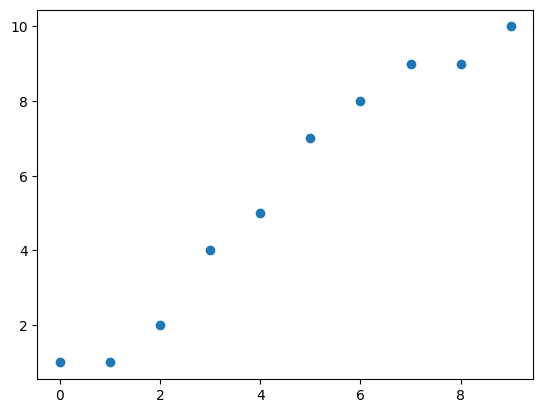

In [75]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.show()

In [76]:
class H():
    def __init__(self, w):
        self.w = w
    
    def forward(self, x):
        return self.w*x
    
h = H(4)
h.forward(5)
        

20

In [77]:
def cost(h, X, Y):
    error = 0
    for i in range(len(X)):
        error += (h.forward(X[i])-Y[i])**2
    error = error/len(X)
    return error

h = H(4)
print(cost(h, X, Y))

222.2


In [78]:
def better_cost(pred_y, true_y):
    error = 0
    for i in range(len(X)):
        error += (pred_y[i] -true_y[i])**2
    error = error/len(X)
    return error

pred_y = [h.forward(X[i]) for i in range(len(X))]
print(better_cost(pred_y, Y))

222.2


[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


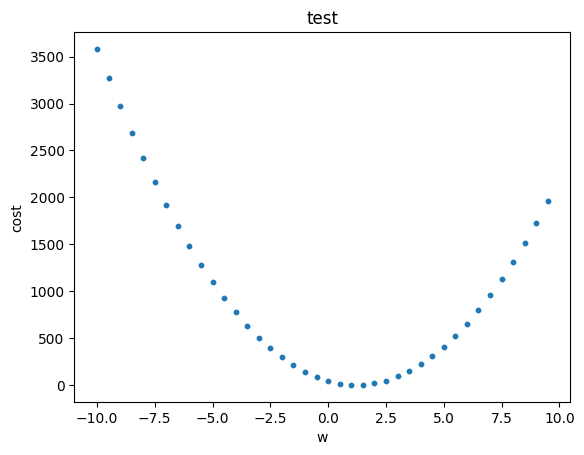

In [79]:
list_w = []
list_c = []
for i in range(-20, 20):
    w = i*0.5
    h = H(w)
    c = cost(h, X, Y)
    list_w.append(w)
    list_c.append(c)

print(list_w)
print(list_c)

plt.title('test')
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=10)
plt.show()


In [80]:
def cal_grad(w, cost): #수치해석적방법
    h = H(w)
    cost1 = cost(h, X, Y)
    eps = 0.001
    h = H(w+eps)
    cost2 = cost(h, X, Y)
    dcost = cost2-cost1
    dw = eps
    return dcost/dw, (cost1+cost2)*0.5

list_w1=[]
list_c1=[]

w = 1.4
lr = 0.01

for i in range(10):
    grad, mean_cost = cal_grad(w, cost)
    w = w + lr*(-grad)
    list_w1.append(w)
    list_c1.append(mean_cost)
    print(w, mean_cost)

1.291715000000012 1.4654142499999985
1.2451524500000108 0.6270309024125553
1.2251305535000077 0.472013821443593
1.2165211380050058 0.44335116317242307
1.2128190893421555 0.4380514376580821
1.2112272084171245 0.43707151841047975
1.210542699619365 0.4368903313415976
1.2102483608363281 0.4368568298525614
1.2101217951596217 0.43685063542723845
1.2100673719186394 0.43684949007799656


In [81]:
list_w2=[]
list_c2=[]
def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(X)):
        grad += 2* (h.forward(X[i])- Y[i])*X[i]
    grad = grad/len(X)
    c = cost(h, X, Y)
    return grad, c

w = 1.4
lr = 0.01

for i in range(10):
    grad, mean_cost = cal_grad2(w, cost)
    w = w + lr*(-grad)
    list_w2.append(w)
    list_c2.append(mean_cost)
    print(w, mean_cost)

1.292 1.459999999999999
1.24556 0.6260240000000001
1.2255908 0.47182183759999974
1.217004044 0.44330985777223975
1.21331173892 0.43803799270208704
1.2117240477356 0.43706322485061583
1.211041340526308 0.4368829902748789
1.2107477764263124 0.4368496649018249
1.2106215438633143 0.4368435030403477
1.2105672638612253 0.43684236371216045


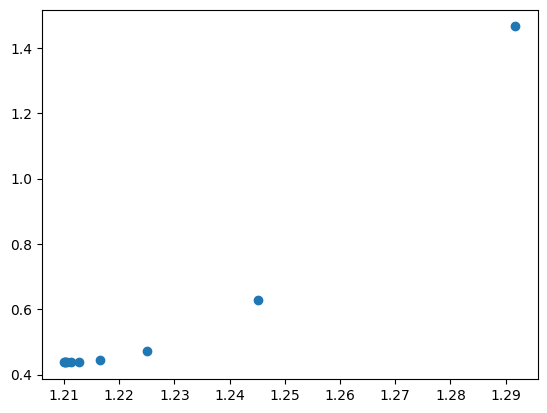

In [87]:
plt.scatter(list_w1, list_c1)

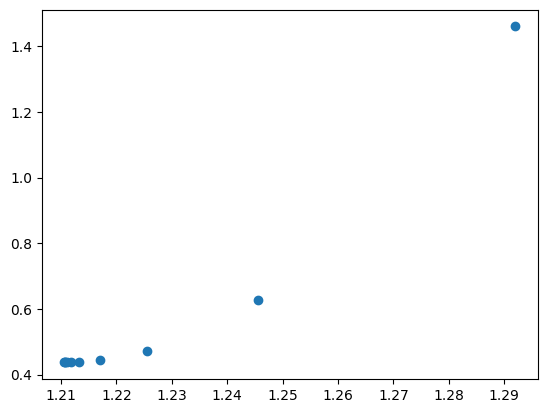

In [86]:
plt.scatter(list_w2, list_c2)

In [89]:
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100):
    grad1, mean_cost1 = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr *grad1
    w2 -= lr*grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost1)
    list_c2.append(mean_cost2)

print(w1, mean_cost1, w2, mean_cost2)

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


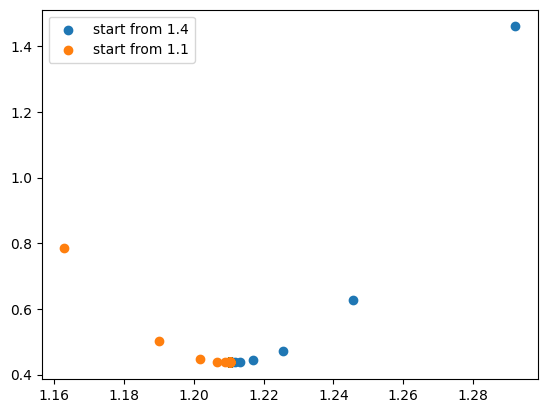

In [92]:
plt.scatter(list_w1, list_c1, label='start from 1.4')
plt.scatter(list_w2, list_c2, label='start from 1.1')
plt.legend()
plt.show()